# All Space Missions from 1957
## Deep Dive in the Space Race

The dataset is prepared by Agirlcoding.

Here is the dataset link : https://www.kaggle.com/agirlcoding/all-space-missions-from-1957

1 - Import libraries I used for visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
from datetime import datetime
%matplotlib inline

sns.set(style="darkgrid")

2 - Define dataframe after loading all values from cv file and assigning them to it

In [2]:
file_location_url = "files/082020_SpaceMission.csv";

space_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = 'unicode_escape', sep = ";")

In [3]:
row_count = space_df.shape[0]
column_count = space_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 4324 , Column : 8


3 - Show first 5 values of dataframe

In [4]:
space_df.head()

Unnamed: 0 Company Name                                           Location  \
0           0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1           1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2           2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3           3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission  
0  StatusActive   50.0         Success  
1  StatusActive  29.75         Success  
2  StatusActive     NaN        Success  
3  StatusActive   65.0         Success  
4  StatusActive  145.0         Success

4 - Show last 5 values of dataframe

In [5]:
space_df.tail()

Unnamed: 0 Company Name                                   Location  \
4319        4319      US Navy   LC-18A, Cape Canaveral AFS, Florida, USA   
4320        4320         AMBA   LC-26A, Cape Canaveral AFS, Florida, USA   
4321        4321      US Navy   LC-18A, Cape Canaveral AFS, Florida, USA   
4322        4322    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323        4323    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                           Datum                      Detail  Status Rocket  \
4319  Wed Feb 05, 1958 07:33 UTC   Vanguard | Vanguard TV3BU  StatusRetired   
4320  Sat Feb 01, 1958 03:48 UTC         Juno I | Explorer 1  StatusRetired   
4321  Fri Dec 06, 1957 16:44 UTC     Vanguard | Vanguard TV3  StatusRetired   
4322  Sun Nov 03, 1957 02:30 UTC  Sputnik 8K71PS | Sputnik-2  StatusRetired   
4323  Fri Oct 04, 1957 19:28 UTC  Sputnik 8K71PS | Sputnik-1  StatusRetired   

      Rocket Status Mission  
4319     NaN        Failure  
4320     NaN        Success  
4321     NaN        Failure  
4322     NaN        Success  
4323     NaN        Success

5 - Show each column information of dataframe

In [6]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Company Name    4324 non-null   object
 2   Location        4324 non-null   object
 3   Datum           4324 non-null   object
 4   Detail          4324 non-null   object
 5   Status Rocket   4324 non-null   object
 6    Rocket         964 non-null    object
 7   Status Mission  4324 non-null   object
dtypes: int64(1), object(7)
memory usage: 270.4+ KB


6 - Show how many variables there are in dataframe

In [7]:
space_df.count()

Unnamed: 0        4324
Company Name      4324
Location          4324
Datum             4324
Detail            4324
Status Rocket     4324
 Rocket            964
Status Mission    4324
dtype: int64

7 - Show descriptive statistics of dataframe

In [8]:
space_df.describe()

Unnamed: 0
count  4324.000000
mean   2161.500000
std    1248.375611
min       0.000000
25%    1080.750000
50%    2161.500000
75%    3242.250000
max    4323.000000

8 - Determine if null values of each column are in a dataframe

In [9]:
space_df.isnull().sum()

Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

9 - Seperate month and year from date Location and hour from datum column

In [10]:
space_df['Launch_Site'] = space_df['Location'].apply(lambda x : x.split(',')[0])
space_df['Space_Port'] = space_df['Location'].apply(lambda x : x.split(',')[1])
space_df['Space_Port_Location_1'] = space_df['Location'].apply(lambda x : x.split(',')[-2])
space_df['Space_Port_Location_2'] = space_df['Location'].apply(lambda x : x.split(',')[-1])

In [11]:
space_df['Hour']=space_df['Datum'].apply(lambda datum: int(datum.split()[-2][:2]) if datum.split()[-1]=='UTC' else np.nan)

In [12]:
space_df['Space_Port_Location'] = space_df['Space_Port_Location_1'] + "," + space_df['Space_Port_Location_2']

10 - Convert Space Port Location Column to List

In [13]:
space_port_location = space_df['Space_Port_Location'].to_list()

11 - Define a function to rearrange space port location

In [14]:
def rearrange_space_port_location(defined_list):
    sample_list = []
    for location in defined_list:
        if "USA" in location:
            sample_list.append(str(location))
        else:
            sample_list.append(str(location.split(',')[1]))
    return sample_list;

12 - Call a function to rearrange space port location and assign list to Space_Port_Location column of dataframe

In [15]:
space_location_list = rearrange_space_port_location(space_port_location)
space_df['Space_Port_Location'] = space_location_list

13 - Drop Location and Unnamed: 0 from dataframe

In [16]:
space_df.drop(['Location','Unnamed: 0'], axis=1, inplace=True)

14 - Convert both "Datum" to defined format as day-month-year

In [17]:
space_df['Datum'] = pd.to_datetime(space_df['Datum'],utc=True)
space_df['Datum'] = space_df['Datum'].dt.strftime('%d-%m-%Y')

15 - Seperate month and year from date Column

In [18]:
space_df['month'] = space_df['Datum'].apply(lambda x : x.split('-')[1])
space_df['year'] = space_df['Datum'].apply(lambda x : x.lstrip().split('-')[-1])

16 - Write a function to rename month name to be more sensible

In [19]:
def convertdatetime(defined_list):    
    sample_list = []
    for date in defined_list:
        month = ""
        if(date in "01"):
            month = "January"
        if(date in "02"):
            month = "February"
        if(date in "03"):
            month = "March"
        if(date in "04"):
            month = "April"
        if(date in "05"):
            month = "May"
        if(date in "06"):
            month = "June"
        if(date in "07"):
            month = "July"
        if(date in "08"):
            month = "August"
        if(date in "09"):
            month = "September"
        if(date in "10"):
            month = "October"
        if(date in "11"):
            month = "November"
        if(date in "12"):
            month = "December"
        sample_list.append(str(month))    
    return sample_list

17 - Redefine values in Date

In [20]:
date_of_month_list = space_df['month'].to_list()

18 - Assign converted datetime to relevant list

In [21]:
month_list = convertdatetime(date_of_month_list)

19 - Convert month number to its name

In [22]:
space_df['month'] = month_list

In [23]:
space_df

Company Name       Datum                                        Detail  \
0          SpaceX  07-08-2020  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1            CASC  06-08-2020           Long March 2D | Gaofen-9 04 & Q-SAT   
2          SpaceX  04-08-2020            Starship Prototype | 150 Meter Hop   
3       Roscosmos  30-07-2020  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4             ULA  30-07-2020                    Atlas V 541 | Perseverance   
...           ...         ...                                           ...   
4319      US Navy  05-02-1958                     Vanguard | Vanguard TV3BU   
4320         AMBA  01-02-1958                           Juno I | Explorer 1   
4321      US Navy  06-12-1957                       Vanguard | Vanguard TV3   
4322    RVSN USSR  03-11-1957                    Sputnik 8K71PS | Sputnik-2   
4323    RVSN USSR  04-10-1957                    Sputnik 8K71PS | Sputnik-1   

      Status Rocket  Rocket Status Mission        Launch_Site  \
0      StatusActive   50.0         Success             LC-39A   
1      StatusActive  29.75         Success  Site 9401 (SLS-2)   
2      StatusActive     NaN        Success              Pad A   
3      StatusActive   65.0         Success        Site 200/39   
4      StatusActive  145.0         Success             SLC-41   
...             ...     ...            ...                ...   
4319  StatusRetired     NaN        Failure             LC-18A   
4320  StatusRetired     NaN        Success             LC-26A   
4321  StatusRetired     NaN        Failure             LC-18A   
4322  StatusRetired     NaN        Success           Site 1/5   
4323  StatusRetired     NaN        Success           Site 1/5   

                            Space_Port             Space_Port_Location_1  \
0                 Kennedy Space Center                           Florida   
1      Jiuquan Satellite Launch Center   Jiuquan Satellite Launch Center   
2                           Boca Chica                             Texas   
3                  Baikonur Cosmodrome               Baikonur Cosmodrome   
4                   Cape Canaveral AFS                           Florida   
...                                ...                               ...   
4319                Cape Canaveral AFS                           Florida   
4320                Cape Canaveral AFS                           Florida   
4321                Cape Canaveral AFS                           Florida   
4322               Baikonur Cosmodrome               Baikonur Cosmodrome   
4323               Baikonur Cosmodrome               Baikonur Cosmodrome   

     Space_Port_Location_2  Hour Space_Port_Location     month  year  
0                      USA   5.0        Florida, USA    August  2020  
1                    China   4.0               China    August  2020  
2                      USA  23.0          Texas, USA    August  2020  
3               Kazakhstan  21.0          Kazakhstan      July  2020  
4                      USA  11.0        Florida, USA      July  2020  
...                    ...   ...                 ...       ...   ...  
4319                   USA   7.0        Florida, USA  February  1958  
4320                   USA   3.0        Florida, USA  February  1958  
4321                   USA  16.0        Florida, USA  December  1957  
4322            Kazakhstan   2.0          Kazakhstan  November  1957  
4323            Kazakhstan  19.0          Kazakhstan   October  1957  

[4324 rows x 14 columns]

20 - Define a Time period showing the timeline of All Space Missions from 1957

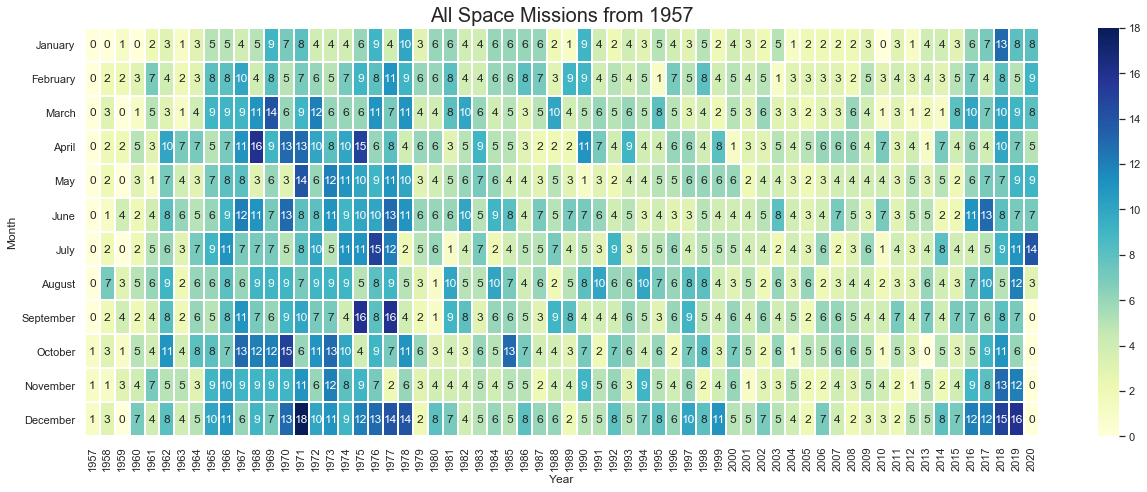

In [24]:
plt.figure(figsize=(18, 7))
space_df.reset_index(inplace = True)
space_df['month'] = pd.Categorical(space_df['month'], 
                                                categories=['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                                ordered=True)

space_df_timeline = space_df.groupby(["year", "month"])["index"].size().reset_index()
space_df_timeline = space_df_timeline.pivot("month", "year", "index")
sns.heatmap(space_df_timeline, cmap="YlGnBu", linewidths=1 ,xticklabels=True, yticklabels=True,annot = True)

plt.title("All Space Missions from 1957", y=1, fontsize=20)
plt.xlabel('Year')
plt.ylabel('Month')
plt.savefig('images/image1.png', bbox_inches = "tight")
plt.tight_layout()
plt.show()

22 - Draw a Figure to make a correlation between Company Name, Space_Port_Location, Status Mission and Status Rocket

In [25]:
space_df_donut = space_df.groupby(["Space_Port_Location_2","Company Name","Status Mission","Status Rocket"]).size().reset_index(name='count')
space_df_donut = space_df_donut.sort_values(by = "count", ascending=True)

In [26]:
space_df_donut

Space_Port_Location_2      Company Name Status Mission  Status Rocket  \
0               Australia              AMBA        Success  StatusRetired   
91            North Korea              KCST        Failure   StatusActive   
87             New Mexico              Exos        Failure   StatusActive   
85             Kazakhstan          Yuzhmash        Success  StatusRetired   
81             Kazakhstan            VKS RF        Failure   StatusActive   
..                    ...               ...            ...            ...   
139                   USA              NASA        Success  StatusRetired   
13                  China              CASC        Success   StatusActive   
129                   USA  General Dynamics        Success  StatusRetired   
75             Kazakhstan         RVSN USSR        Success  StatusRetired   
105                Russia         RVSN USSR        Success  StatusRetired   

     count  
0        1  
91       1  
87       1  
85       1  
81       1  
..     ...  
139    186  
13     201  
129    203  
75     495  
105   1119  

[161 rows x 5 columns]

In [27]:
fig = px.sunburst(space_df_donut, 
                  path=["Space_Port_Location_2","Company Name","Status Mission","Status Rocket"], 
                  values='count',
                  title = "Space Mission by Company Name, Space Port Location,Status Mission and Status Rocket from 1957"
                 )
fig.update_layout(height=700, width=950)
pio.write_image(fig, "images/image2.png")
fig.show()

23 - Draw a Figure to show the top 15 most expensive rocket ever built and top 15 Space Port with most launchers from 1957

In [28]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   index                  4324 non-null   int64   
 1   Company Name           4324 non-null   object  
 2   Datum                  4324 non-null   object  
 3   Detail                 4324 non-null   object  
 4   Status Rocket          4324 non-null   object  
 5    Rocket                964 non-null    object  
 6   Status Mission         4324 non-null   object  
 7   Launch_Site            4324 non-null   object  
 8   Space_Port             4324 non-null   object  
 9   Space_Port_Location_1  4324 non-null   object  
 10  Space_Port_Location_2  4324 non-null   object  
 11  Hour                   4198 non-null   float64 
 12  Space_Port_Location    4324 non-null   object  
 13  month                  4324 non-null   category
 14  year                   4324 non-null   o

In [29]:
space_df.columns = space_df.columns.str.replace(' ', '')

In [30]:
space_df_rocket = space_df.sort_values(['Rocket'], ascending = False)
space_df_rocket = space_df_rocket[["Detail","Rocket"]]
space_df_rocket = space_df_rocket[space_df_rocket['Rocket'].notna()]
space_df_rocket = space_df_rocket.head(15)
space_df_rocket["Rocket"] = pd.to_numeric(space_df_rocket["Rocket"])
space_df_rocket.reset_index(drop=True)


space_df_port = space_df.groupby(["Space_Port"]).size().reset_index(name='count')
space_df_port = space_df_port.sort_values(by = "count", ascending=False)
space_df_port.reset_index(drop=True)
space_df_port = space_df_port.head(15)

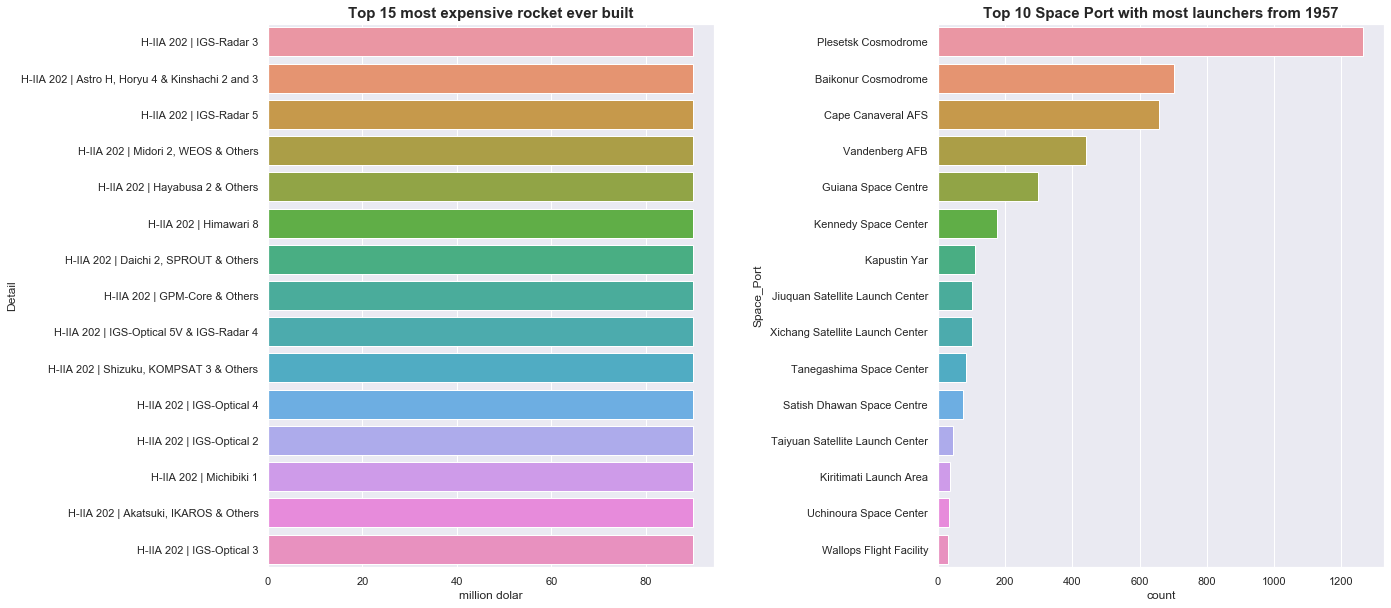

In [31]:
f,a = plt.subplots(1,2,figsize=(20,10))
f.subplots_adjust(wspace = .5)


sns.barplot(data = space_df_rocket, 
            x = "Rocket" , 
            y = "Detail", ax=a[0])
a[0].set_title('Top 15 most expensive rocket ever built', fontsize=15, fontweight='bold')
a[0].set_xlabel('million dolar');

sns.barplot(data = space_df_port, 
            x = "count" , 
            y = "Space_Port", ax=a[1])
a[1].set_title('Top 10 Space Port with most launchers from 1957', fontsize=15, fontweight='bold')
a[1].set_xlabel('count');

plt.savefig('images/image3.png', bbox_inches = "tight")
plt.show()

24 - Draw a WordCloud to show the names of Space Port

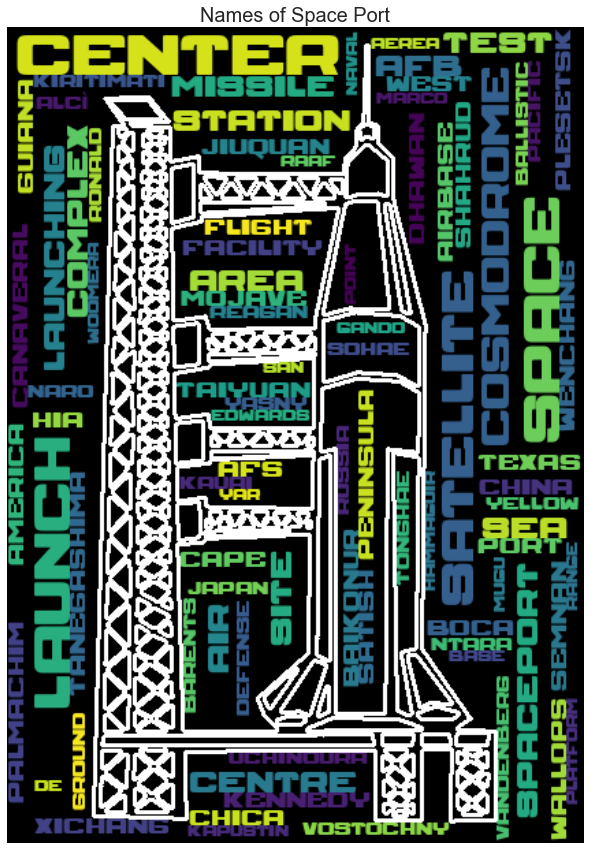

In [32]:
plt.figure(figsize=[15, 15])

image = Image.open("images/rocketlaunch.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black',
                        font_path='fonts/SPACE.ttf',
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(space_df['Space_Port'].unique()))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Names of Space Port', fontsize=20)
plt.savefig('images/image4.png')
plt.show()

25 - Draw A figure to show the number of total rocket launches by country

In [33]:
space_df['Space_Port_Location_2'] = space_df['Space_Port_Location_2'].str.lstrip()

In [34]:
space_df_by_country = space_df.groupby('Space_Port_Location_2').count()["index"].reset_index().sort_values(by = "index",ascending=False)

In [35]:
space_df_by_country = space_df_by_country.reset_index(drop = True)
space_df_by_country

Space_Port_Location_2  index
0                           Russia   1395
1                              USA   1344
2                       Kazakhstan    701
3                           France    303
4                            China    268
5                            Japan    126
6                            India     76
7                    Pacific Ocean     36
8                      New Zealand     13
9                             Iran     13
10                          Israel     11
11                           Kenya      9
12                       Australia      6
13                     North Korea      5
14                      New Mexico      4
15                     Barents Sea      3
16                     South Korea      3
17                          Brazil      3
18                    Gran Canaria      2
19  Pacific Missile Range Facility      1
20       Shahrud Missile Test Site      1
21                      Yellow Sea      1

In [36]:
space_df_by_country.loc[space_df_by_country["Space_Port_Location_2"] == "New Mexico", "Space_Port_Location_2"] = "USA"
space_df_by_country.loc[space_df_by_country["Space_Port_Location_2"] == "Yellow Sea", "Space_Port_Location_2"] = "China"
space_df_by_country.loc[space_df_by_country["Space_Port_Location_2"] == "Shahrud Missile Test Site", "Space_Port_Location_2"] = "Iran"
space_df_by_country.loc[space_df_by_country["Space_Port_Location_2"] == "Pacific Missile Range Facility", "Space_Port_Location_2"] = "USA"
space_df_by_country.loc[space_df_by_country["Space_Port_Location_2"] == "Barents Sea", "Space_Port_Location_2"] = "Russia"
space_df_by_country.loc[space_df_by_country["Space_Port_Location_2"] == "Gran Canaria", "Space_Port_Location_2"] = "USA"

In [37]:
space_df_by_country = space_df_by_country.groupby('Space_Port_Location_2').sum()["index"].reset_index().sort_values(by = "index",ascending=False)

In [38]:
space_df_by_country = space_df_by_country.reset_index(drop = True)
space_df_by_country

Space_Port_Location_2  index
0                 Russia   1398
1                    USA   1351
2             Kazakhstan    701
3                 France    303
4                  China    269
5                  Japan    126
6                  India     76
7          Pacific Ocean     36
8                   Iran     14
9            New Zealand     13
10                Israel     11
11                 Kenya      9
12             Australia      6
13           North Korea      5
14                Brazil      3
15           South Korea      3

In [39]:
space_df_by_country.rename(columns={"index":"count"},inplace=True)

In [40]:
fig = px.choropleth(space_df_by_country, 
                    locations="Space_Port_Location_2", 
                    locationmode='country names', 
                    color="count", 
                    hover_name="Space_Port_Location_2", 
                    color_continuous_scale="YlOrRd",                    
                    title='The number of total rocket launches by country from 1957')

fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
pio.write_image(fig, "images/image5.png") 
fig.show()

26 - Draw a Figure to show the number of space missions by country and year

In [41]:
space_df_port_year = space_df.groupby(["Space_Port_Location_2", "year"])["Space_Port"].count()
space_df_port_year = space_df_port_year.reset_index(level=[0,1])
space_df_port_year

Space_Port_Location_2  year  Space_Port
0               Australia  1967           1
1               Australia  1968           1
2               Australia  1969           1
3               Australia  1970           2
4               Australia  1971           1
..                    ...   ...         ...
431                   USA  2017          30
432                   USA  2018          33
433                   USA  2019          24
434                   USA  2020          21
435            Yellow Sea  2019           1

[436 rows x 3 columns]

In [42]:
fig = px.bar(space_df_port_year, 
             x='year', 
             y='Space_Port', 
             color ='Space_Port_Location_2',
             title='The number of space missions by location and year from 1957',
             color_discrete_sequence=px.colors.qualitative.Alphabet,
             height = 650
            )
pio.write_image(fig, "images/image6.png") 
fig.show()

27 - Draw a Figure to show the number of space missions by month from 1957

In [43]:
space_df_month = space_df.groupby('month').count()['Detail'].reset_index()
space_df_month

month  Detail
0     January     268
1    February     336
2       March     353
3       April     383
4         May     326
5        June     402
6        July     351
7      August     373
8   September     365
9     October     381
10   November     336
11   December     450

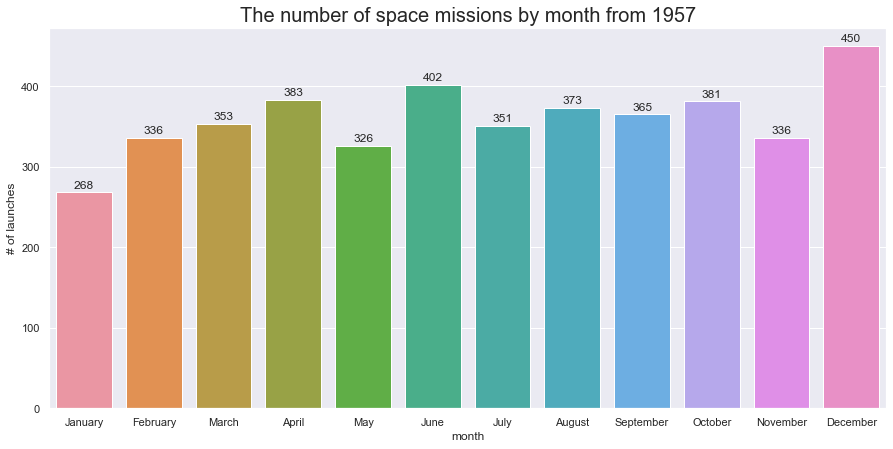

In [44]:
plt.figure(figsize=[15, 7])

bar=sns.barplot(data=space_df_month,
                x='month',
                y='Detail')
for p in bar.patches:
    bar.annotate(int(p.get_height()), 
               (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='center', 
               xytext=(0,7), textcoords = 'offset points')
plt.ylabel('# of launches')
plt.title('The number of space missions by month from 1957', fontsize=20)
plt.savefig('images/image7.png', bbox_inches = "tight")
plt.show()

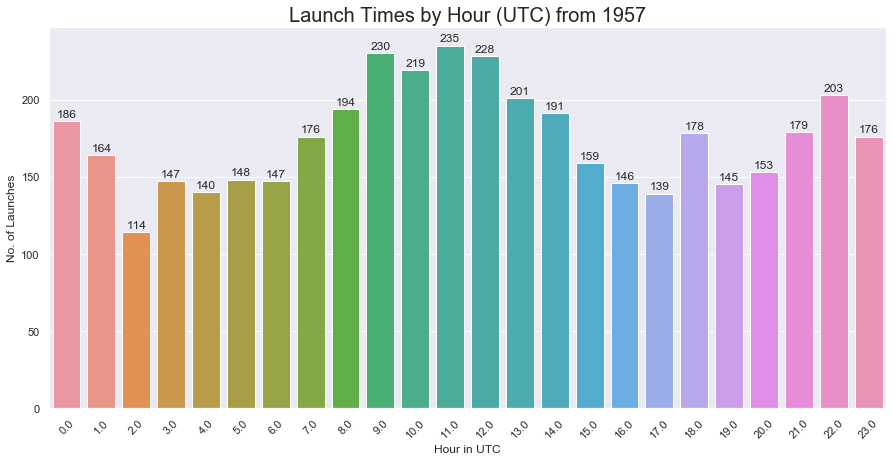

In [45]:
plt.figure(figsize=[15, 7])

bar = sns.countplot(x='Hour', data=space_df, order=space_df['Hour'].unique().sort())

for p in bar.patches:
    bar.annotate(int(p.get_height()), 
               (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='center', 
               xytext=(0,7), textcoords = 'offset points')

plt.xlabel('Hour in UTC')
plt.ylabel('No. of Launches')
plt.xticks(rotation=45)
plt.title('Launch Times by Hour (UTC) from 1957', fontsize=20)
plt.savefig('images/image8.png', bbox_inches = "tight")
plt.show()